# MACHINE LEARNING MODELS FOR PROSTATE CANCER PREDICTION

This notebook contains 4 main parts:
1. Handling Missing Values
2. Data Analysis
3. Machine Learnig Models for Classification
   1. Logistic Regression
   2. Support Vector Machines
   3. K-Nearest Neighbors
   4. Naive Bayes
   5. Decision Tree
   6. Random Forest	
   7. Gradient Boosting Classifier
   8. XGBoost Classifier
   9. LightGBM Classifier
4. Comparison of the Results

## 1. HANDLING MISSING VALUES

In [1]:
# Importing necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from fancyimpute import IterativeImputer

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy import stats

In [2]:
data = pd.read_csv("Desktop//492_PROJE//Results.csv")
data

AGE       PSA  FREE_PSA  PREVIOUS_YEAR_PSA  PROSTATE_VOLUME  PIRADS  \
0     48.0   2.91000       NaN                NaN          50.0000     1.0   
1     54.0  12.30000       NaN                NaN          55.0000     2.0   
2     69.0   5.91000       NaN                NaN          37.2000     2.0   
3     46.0   3.02000       NaN                NaN          14.0000     2.0   
4     65.0   5.64000       NaN                NaN         102.5000     2.0   
...    ...       ...       ...                ...              ...     ...   
1290  64.0   2.11265  0.437261            1.94261          37.0419     NaN   
1291  64.0   2.86860  0.664945            2.63772          50.2964     NaN   
1292  65.0   3.52653  0.893660            3.24269          61.8322     NaN   
1293  65.0   3.14104  0.756203            2.88823          55.0732     NaN   
1294  65.0   1.31495  0.243383            1.20911          25.3594     NaN   

      GLEASON    BIOPSY  DATASET  
0         0.0    Benign  Germany  
1         0.0    Benign  Germany  
2         0.0    Benign  Germany  
3         0.0    Benign  Germany  
4         0.0    Benign  Germany  
...       ...       ...      ...  
1290      NaN  No Tumor       SD  
1291      NaN  No Tumor       SD  
1292      NaN  No Tumor       SD  
1293      NaN  No Tumor       SD  
1294      NaN  No Tumor       SD  

[1295 rows x 9 columns]

In [3]:
# Importing data

data['BIOPSY'] = [1 if x=="Malign" else 0 if x=="Benign" else 0 for x in data['BIOPSY']]
data = data.drop('GLEASON', axis=1)
data.head(10)

AGE    PSA  FREE_PSA  PREVIOUS_YEAR_PSA  PROSTATE_VOLUME  PIRADS  BIOPSY  \
0  48.0   2.91       NaN                NaN             50.0     1.0       0   
1  54.0  12.30       NaN                NaN             55.0     2.0       0   
2  69.0   5.91       NaN                NaN             37.2     2.0       0   
3  46.0   3.02       NaN                NaN             14.0     2.0       0   
4  65.0   5.64       NaN                NaN            102.5     2.0       0   
5  72.0  11.81       NaN                NaN             63.8     2.0       0   
6  66.0   5.25       NaN                NaN             29.7     2.0       0   
7  56.0   6.80       NaN                NaN             21.0     2.0       0   
8  58.0   8.87       NaN                NaN             47.0     2.0       0   
9  46.0   5.35       NaN                NaN             20.6     2.0       0   

   DATASET  
0  Germany  
1  Germany  
2  Germany  
3  Germany  
4  Germany  
5  Germany  
6  Germany  
7  Germany  
8  Germany  
9  Germany

In [4]:
X = data.iloc[:, 0:6]
Y = data['BIOPSY']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle = True)


In [5]:
data_median = X_train.copy()
data_median['AGE'] = data_median['AGE'].fillna(data_median['AGE'].median())
data_median['PSA'] = data_median['PSA'].fillna(data_median['PSA'].median())
data_median['FREE_PSA'] = data_median['FREE_PSA'].fillna(data_median['FREE_PSA'].median())
data_median['PREVIOUS_YEAR_PSA'] = data_median['PREVIOUS_YEAR_PSA'].fillna(data_median['PREVIOUS_YEAR_PSA'].median())
data_median['PROSTATE_VOLUME'] = data_median['PROSTATE_VOLUME'].fillna(data_median['PROSTATE_VOLUME'].median())
data_median['PIRADS'] = data_median['PIRADS'].fillna(data_median['PIRADS'].median())
data_median.describe()

AGE         PSA    FREE_PSA  PREVIOUS_YEAR_PSA  PROSTATE_VOLUME  \
count  906.000000  906.000000  906.000000         906.000000       906.000000   
mean    63.770419    8.624000    0.647103           2.349429        50.626144   
std      8.538133    9.183624    0.758638           2.074516        28.065660   
min     30.000000    0.450000    0.000000           0.927460        11.000000   
25%     58.000000    4.355000    0.537032           2.234360        33.000000   
50%     64.000000    6.620000    0.537032           2.234360        43.213850   
75%     70.000000   10.137500    0.537032           2.234360        59.681275   
max     85.000000  156.000000   17.000000          59.000000       313.000000   

           PIRADS  
count  906.000000  
mean     3.919426  
std      0.675636  
min      1.000000  
25%      4.000000  
50%      4.000000  
75%      4.000000  
max      5.000000

In [6]:
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
data_knn = X_train.copy(deep=True)
data_knn.iloc[:, :] = knn_imputer.fit_transform(data_knn)
data_knn.head(10)
data_knn.describe()

AGE         PSA    FREE_PSA  PREVIOUS_YEAR_PSA  PROSTATE_VOLUME  \
count  906.000000  906.000000  906.000000         906.000000       906.000000   
mean    63.722030    8.736619    1.538787           6.066723        51.500939   
std      8.585012    9.227791    1.190625           4.204590        28.337228   
min     30.000000    0.450000    0.000000           0.927460        11.000000   
25%     58.000000    4.342500    0.885815           3.528000        33.000000   
50%     64.000000    6.700000    1.244000           4.830000        44.889300   
75%     70.000000   10.439000    1.908000           8.760000        61.000000   
max     85.000000  156.000000   17.000000          59.000000       313.000000   

           PIRADS  
count  906.000000  
mean     3.628117  
std      0.845030  
min      1.000000  
25%      3.000000  
50%      4.000000  
75%      4.000000  
max      5.000000

In [7]:
mice_imputer = IterativeImputer()
data_mice = X_train.copy(deep=True)
data_mice.iloc[:, :] = mice_imputer.fit_transform(data_mice)
data_mice['PREVIOUS_YEAR_PSA'] = [0 if x<=0 else x for x in data_mice['PREVIOUS_YEAR_PSA']]
data_mice['FREE_PSA'] = [0 if x<=0 else x for x in data_mice['FREE_PSA']]
data_mice['AGE'] = [0 if x<=0 else x for x in data_mice['AGE']]
data_mice['PSA'] = [0 if x<=0 else x for x in data_mice['PSA']]
data_mice['PROSTATE_VOLUME'] = [0 if x<=0 else x for x in data_mice['PROSTATE_VOLUME']]
data_mice.describe()


AGE         PSA    FREE_PSA  PREVIOUS_YEAR_PSA  PROSTATE_VOLUME  \
count  906.000000  906.000000  906.000000         906.000000       906.000000   
mean    64.210849    8.693161    1.634235           4.809118        53.570283   
std     11.918448    9.182399    1.637443           4.039237        36.525808   
min      0.000000    0.450000    0.000000           0.000000         0.000000   
25%     58.000000    4.350000    0.786500           2.732669        33.000000   
50%     64.000000    6.760000    1.316675           4.200299        45.000000   
75%     70.000000   10.300000    1.983428           5.849014        63.000000   
max    268.249386  156.000000   25.853165          59.000000       656.506469   

           PIRADS  
count  906.000000  
mean     3.814643  
std      0.854185  
min     -3.166127  
25%      3.256487  
50%      4.000000  
75%      4.000000  
max      7.104069

In [8]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
sns.set_style('whitegrid')
plt.style.use('seaborn-bright')

Text(0.5, 0, 'Age')

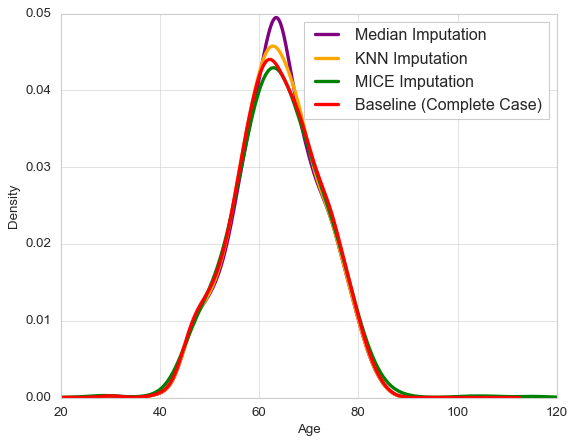

In [9]:
data_no_null1 = X_train.dropna(subset=['AGE'])

data_median['AGE'].plot(kind='kde', c='purple', linewidth=3)
data_knn['AGE'].plot(kind='kde', c='orange', linewidth=3)
data_mice['AGE'].plot(kind='kde', c='green', linewidth=3)
data_no_null1['AGE'].plot(kind='kde', c='red', linewidth=3)
labels = ['Median Imputation', 'KNN Imputation', 'MICE Imputation', 'Baseline (Complete Case)']
plt.legend(labels)
plt.xlim(20, 120)
plt.xlabel('Age')

Text(0.5, 0, 'PSA')

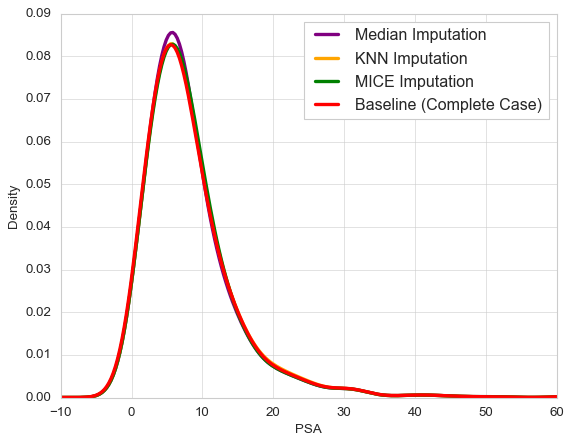

In [10]:
data_no_null3 = X_train.dropna(subset=['PSA'])

data_median['PSA'].plot(kind='kde', c='purple', linewidth=3)
data_knn['PSA'].plot(kind='kde', c='orange', linewidth=3)
data_mice['PSA'].plot(kind='kde', c='green', linewidth=3)
data_no_null3['PSA'].plot(kind='kde', c='red', linewidth=3)

labels = ['Median Imputation', 'KNN Imputation', 'MICE Imputation', 'Baseline (Complete Case)']
plt.legend(labels)
plt.xlim(-10, 60)
plt.xlabel('PSA')

Text(0.5, 0, 'Free_PSA')

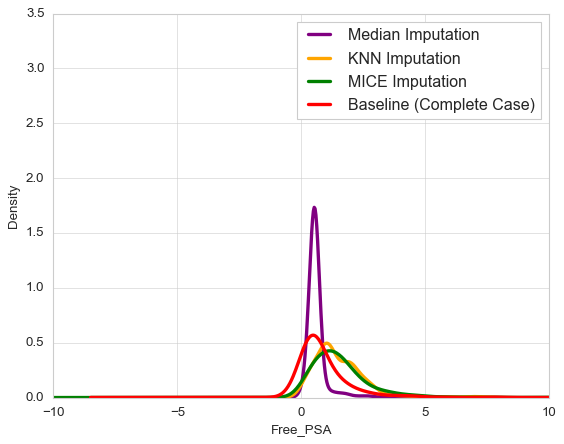

In [11]:
data_no_null4 = X_train.dropna(subset=['FREE_PSA'])

data_median['FREE_PSA'].plot(kind='kde', c='purple', linewidth=3)
data_knn['FREE_PSA'].plot(kind='kde', c='orange', linewidth=3)
data_mice['FREE_PSA'].plot(kind='kde', c='green', linewidth=3)
data_no_null4['FREE_PSA'].plot(kind='kde', c='red', linewidth=3)

labels = ['Median Imputation', 'KNN Imputation', 'MICE Imputation', 'Baseline (Complete Case)']
plt.legend(labels)
plt.xlim(-10, 10)
plt.ylim(0, 3.5)
plt.xlabel('Free_PSA')

Text(0.5, 0, 'PREVIOUS_YEAR_PSA')

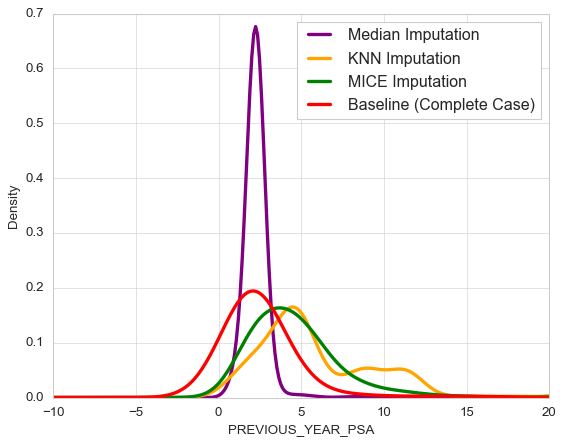

In [12]:
data_no_null5 = X_train.dropna(subset=['PREVIOUS_YEAR_PSA'])

data_median['PREVIOUS_YEAR_PSA'].plot(kind='kde', c='purple', linewidth=3)
data_knn['PREVIOUS_YEAR_PSA'].plot(kind='kde', c='orange', linewidth=3)
data_mice['PREVIOUS_YEAR_PSA'].plot(kind='kde', c='green', linewidth=3)
data_no_null5['PREVIOUS_YEAR_PSA'].plot(kind='kde', c='red', linewidth=3)

labels = ['Median Imputation', 'KNN Imputation', 'MICE Imputation', 'Baseline (Complete Case)']
plt.legend(labels)
plt.xlim(-10, 20)
plt.xlabel('PREVIOUS_YEAR_PSA')

Text(0.5, 0, 'PROSTATE_VOLUME')

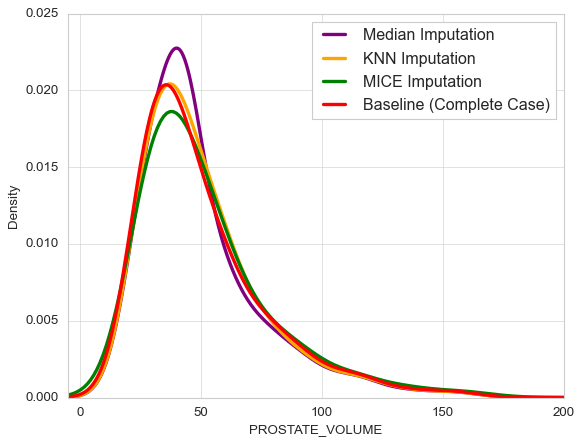

In [13]:
data_no_null7 = X_train.dropna(subset=['PROSTATE_VOLUME'])

data_median['PROSTATE_VOLUME'].plot(kind='kde', c='purple', linewidth=3)
data_knn['PROSTATE_VOLUME'].plot(kind='kde', c='orange', linewidth=3)
data_mice['PROSTATE_VOLUME'].plot(kind='kde', c='green', linewidth=3)
data_no_null7['PROSTATE_VOLUME'].plot(kind='kde', c='red', linewidth=3)

labels = ['Median Imputation', 'KNN Imputation', 'MICE Imputation', 'Baseline (Complete Case)']
plt.legend(labels)
plt.xlim(-5, 200)
plt.xlabel('PROSTATE_VOLUME')

Text(0.5, 0, 'PIRADS')

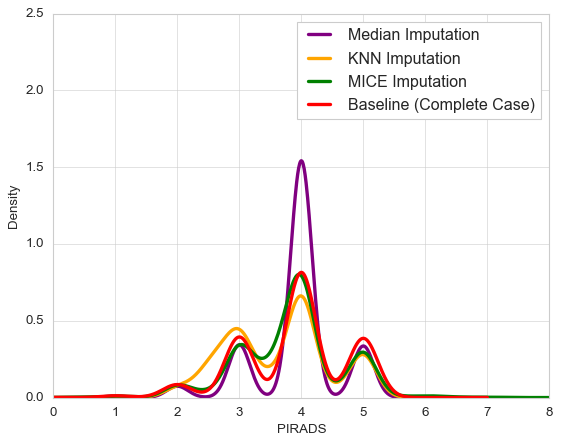

In [14]:
data_no_null8 = X_train.dropna(subset=['PIRADS'])

data_median['PIRADS'].plot(kind='kde', c='purple', linewidth=3)
data_knn['PIRADS'].plot(kind='kde', c='orange', linewidth=3)
data_mice['PIRADS'].plot(kind='kde', c='green', linewidth=3)
data_no_null8['PIRADS'].plot(kind='kde', c='red', linewidth=3)

labels = ['Median Imputation', 'KNN Imputation', 'MICE Imputation', 'Baseline (Complete Case)']
plt.legend(labels)
plt.xlim(0, 8)
plt.ylim(0, 2.5)
plt.xlabel('PIRADS')

## 2. DATA ANALYSIS

In [15]:
X_train_1 = data_knn.copy(deep = True)
data_1 = X_train_1.join(Y_train)
X_test.iloc[:, :] =knn_imputer.transform(X_test)
X_test.describe()

AGE         PSA    FREE_PSA  PREVIOUS_YEAR_PSA  PROSTATE_VOLUME  \
count  389.000000  389.000000  389.000000         389.000000       389.000000   
mean    63.365963    8.622725    1.519406           6.277852        50.683028   
std      8.292923    6.472540    0.958362           3.913638        29.268688   
min     38.000000    0.240000    0.090000           0.780000         9.000000   
25%     58.000000    4.340000    0.864000           3.686538        33.000000   
50%     64.000000    7.110000    1.290000           4.854000        41.461100   
75%     69.000000   11.300000    1.984000           8.760000        58.800000   
max     87.000000   44.750000    5.710000          21.366000       192.000000   

           PIRADS  
count  389.000000  
mean     3.700961  
std      0.860457  
min      1.000000  
25%      3.000000  
50%      4.000000  
75%      4.000000  
max      5.000000

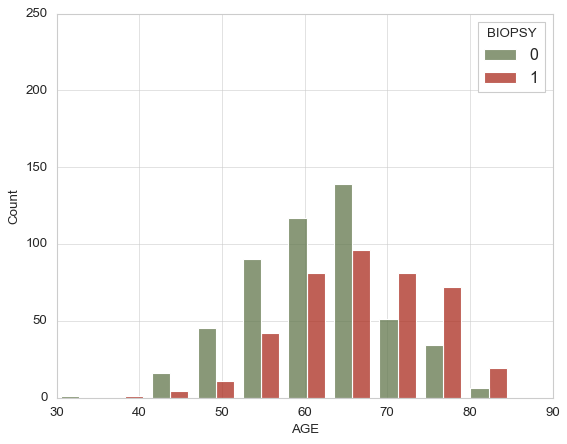

In [16]:
sns.set_style('whitegrid')
p1 = sns.histplot(data=data_1, x="AGE", hue="BIOPSY", 
             bins = 10, multiple="dodge", palette = ["#61764B", "#AA2B1D"], shrink=.8)
p1 = (p1.set(xlim=(30,90),ylim=(0,250)))

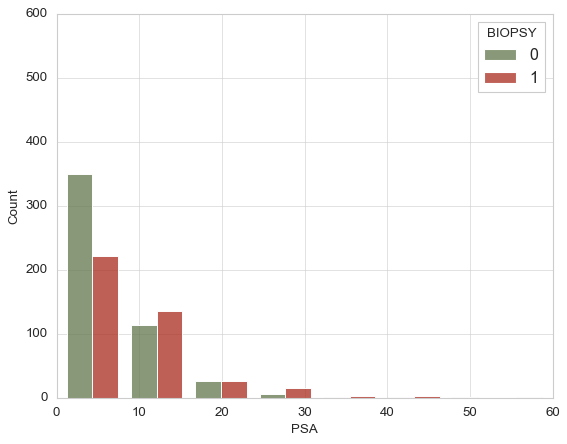

In [17]:
sns.set_style('whitegrid')
p1 = sns.histplot(data=data_1, x="PSA", hue="BIOPSY", 
             bins = 20, multiple="dodge", palette = ["#61764B", "#AA2B1D"], shrink=.8)
p1 = (p1.set(xlim=(0,60),ylim=(0,600)))

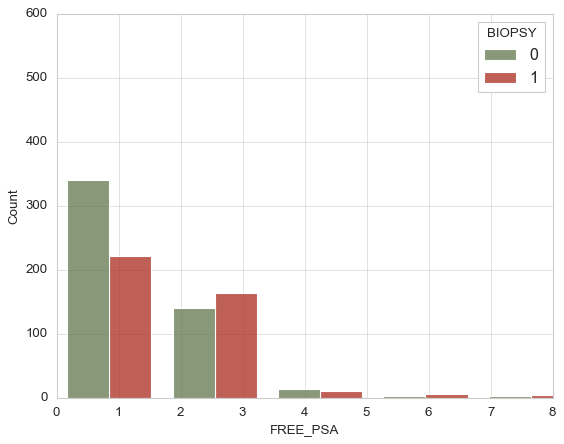

In [18]:
p2 = sns.histplot(data=data_1, x="FREE_PSA", hue="BIOPSY", 
             bins = 10, multiple="dodge", palette = ["#61764B", "#AA2B1D"],
             shrink=.8)
p2 = (p2.set(xlim=(0,8),ylim=(0,600)))

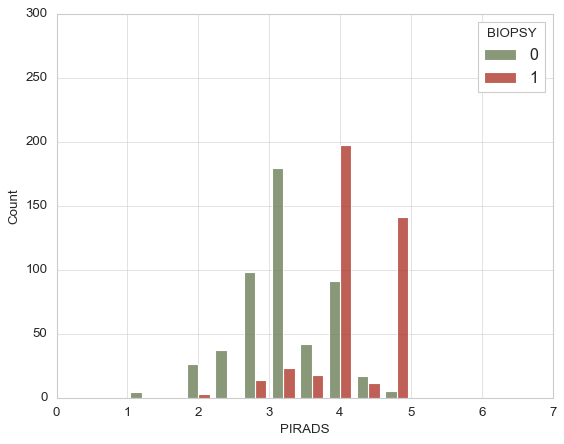

In [19]:
p3 = sns.histplot(data=data_1, x="PIRADS", hue="BIOPSY", 
             bins = 10, multiple="dodge", palette = ["#61764B", "#AA2B1D"],
             shrink=.8)
p3 = (p3.set(xlim=(0,7),ylim=(0,300)))

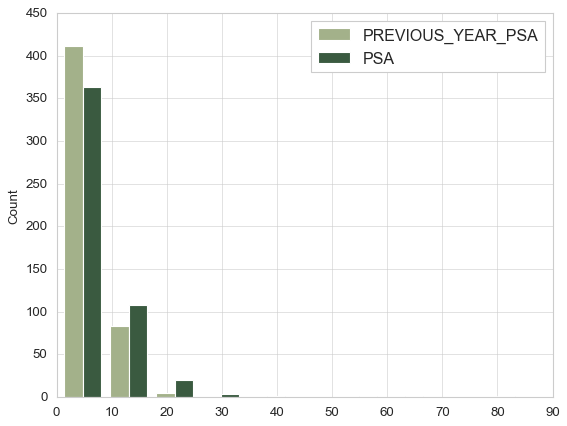

In [20]:
colors = ['#a3b18a','#3a5a40']
data_ben = data_1[data_1['BIOPSY']==0]

#plots the histogram
fig, ax1 = plt.subplots()
ax1.hist([data_ben['PREVIOUS_YEAR_PSA'], data_ben['PSA']],color=colors, label=['PREVIOUS_YEAR_PSA', 'PSA'])
ax1.set_ylabel("Count")
plt.legend(loc='upper right')
plt.show()

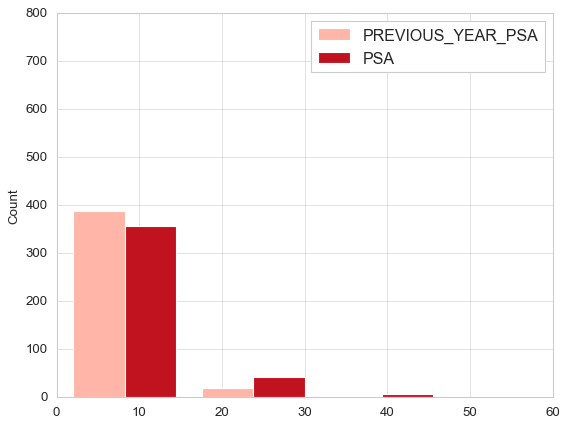

In [21]:
colors = ['#ffb5a7','#c1121f']
data_mal = data_1[data_1['BIOPSY']==1]

#plots the histogram
fig, ax1 = plt.subplots()
p4 = ax1.hist([data_mal['PREVIOUS_YEAR_PSA'], data_mal['PSA']],color=colors, label=['PREVIOUS_YEAR_PSA', 'PSA'])
ax1.set_ylabel("Count")
plt.legend(loc='upper right')
plt.xlim(0, 60)
plt.ylim(0, 800)
plt.show()

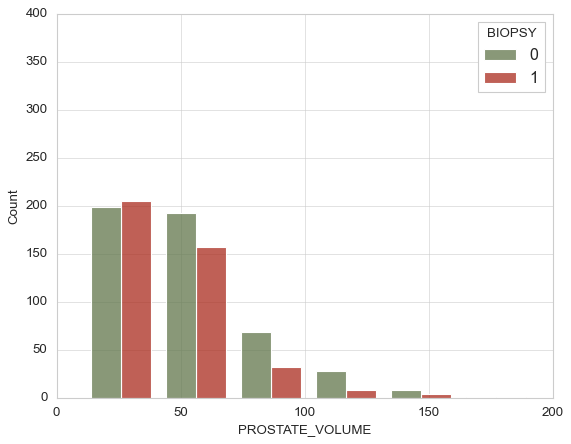

In [22]:
sns.set_style('whitegrid')
p1 = sns.histplot(data=data_1, x="PROSTATE_VOLUME", hue="BIOPSY", 
             bins = 10, multiple="dodge", palette = ["#61764B", "#AA2B1D"], shrink=.8)
p1 = (p1.set(xlim=(0,200),ylim=(0,400)))

                        AGE       PSA  FREE_PSA  PREVIOUS_YEAR_PSA  \
AGE                1.000000  0.068853  0.055961           0.093192   
PSA                0.068853  1.000000  0.724379           0.673437   
FREE_PSA           0.055961  0.724379  1.000000           0.884509   
PREVIOUS_YEAR_PSA  0.093192  0.673437  0.884509           1.000000   
PROSTATE_VOLUME    0.026308  0.274404  0.382845           0.341807   
PIRADS             0.284067  0.322617  0.279076           0.355276   
BIOPSY             0.277837  0.173001  0.156894           0.240377   

                   PROSTATE_VOLUME    PIRADS    BIOPSY  
AGE                       0.026308  0.284067  0.277837  
PSA                       0.274404  0.322617  0.173001  
FREE_PSA                  0.382845  0.279076  0.156894  
PREVIOUS_YEAR_PSA         0.341807  0.355276  0.240377  
PROSTATE_VOLUME           1.000000 -0.066100 -0.164659  
PIRADS                   -0.066100  1.000000  0.639386  
BIOPSY                   -0.164659  0.63

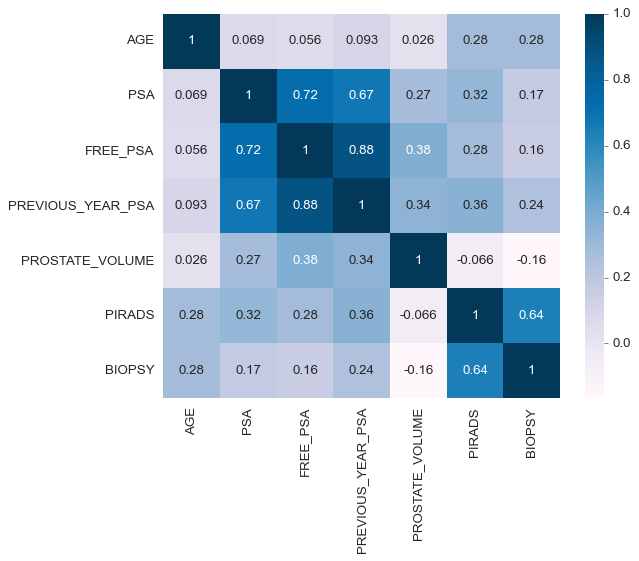

In [23]:
print(data_1.corr())
dataplot = sns.heatmap(data_1.corr(), cmap="PuBu", annot=True)
plt.show()

                        AGE       PSA  FREE_PSA  PREVIOUS_YEAR_PSA  \
AGE                1.000000  0.019596 -0.023927          -0.033261   
PSA                0.019596  1.000000  0.830372           0.812137   
FREE_PSA          -0.023927  0.830372  1.000000           0.880445   
PREVIOUS_YEAR_PSA -0.033261  0.812137  0.880445           1.000000   
PROSTATE_VOLUME    0.116179  0.451909  0.528409           0.542427   
PIRADS             0.047384  0.336562  0.245385           0.262789   
BIOPSY                  NaN       NaN       NaN                NaN   

                   PROSTATE_VOLUME    PIRADS  BIOPSY  
AGE                       0.116179  0.047384     NaN  
PSA                       0.451909  0.336562     NaN  
FREE_PSA                  0.528409  0.245385     NaN  
PREVIOUS_YEAR_PSA         0.542427  0.262789     NaN  
PROSTATE_VOLUME           1.000000  0.100201     NaN  
PIRADS                    0.100201  1.000000     NaN  
BIOPSY                         NaN       NaN     NaN  

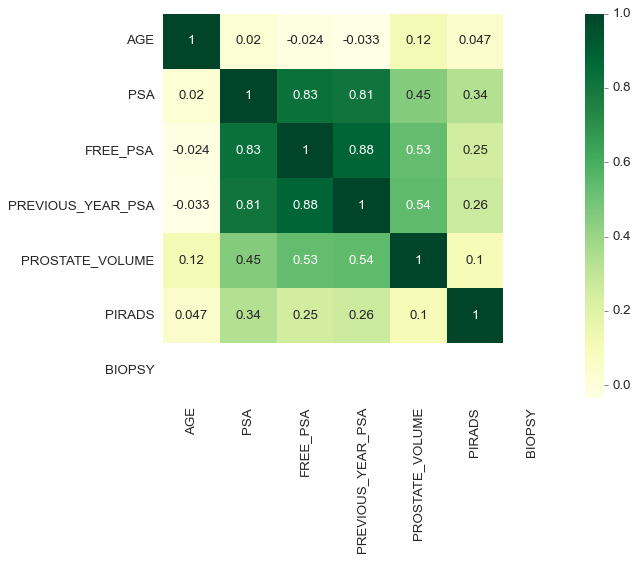

In [24]:
data_mal = data_1[data_1['BIOPSY'] == 0]
print(data_mal.corr())
dataplot = sns.heatmap(data_mal.corr(), cmap="YlGn", annot=True)
plt.show()

                        AGE       PSA  FREE_PSA  PREVIOUS_YEAR_PSA  \
AGE                1.000000  0.024652  0.049248           0.083325   
PSA                0.024652  1.000000  0.648899           0.573158   
FREE_PSA           0.049248  0.648899  1.000000           0.887231   
PREVIOUS_YEAR_PSA  0.083325  0.573158  0.887231           1.000000   
PROSTATE_VOLUME    0.011932  0.201735  0.305449           0.264609   
PIRADS             0.262318  0.245579  0.228380           0.283513   
BIOPSY                  NaN       NaN       NaN                NaN   

                   PROSTATE_VOLUME    PIRADS  BIOPSY  
AGE                       0.011932  0.262318     NaN  
PSA                       0.201735  0.245579     NaN  
FREE_PSA                  0.305449  0.228380     NaN  
PREVIOUS_YEAR_PSA         0.264609  0.283513     NaN  
PROSTATE_VOLUME           1.000000 -0.029869     NaN  
PIRADS                   -0.029869  1.000000     NaN  
BIOPSY                         NaN       NaN     NaN  

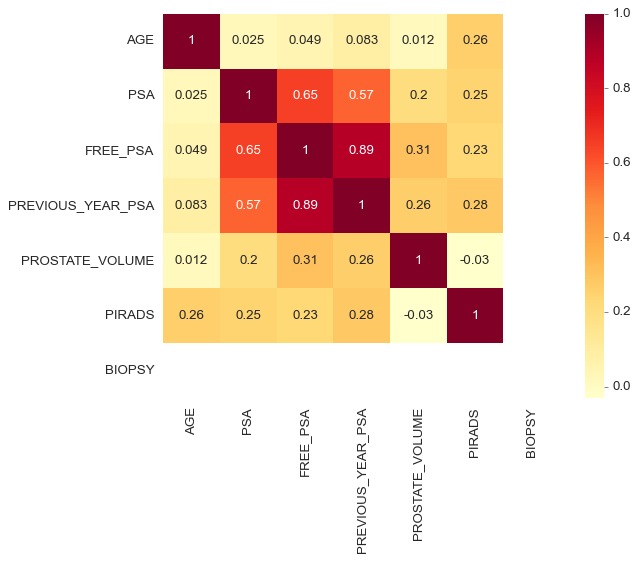

In [25]:
data_mal = data_1[data_1['BIOPSY'] == 1]
print(data_mal.corr())
dataplot = sns.heatmap(data_mal.corr(), cmap="YlOrRd", annot=True)
plt.show()

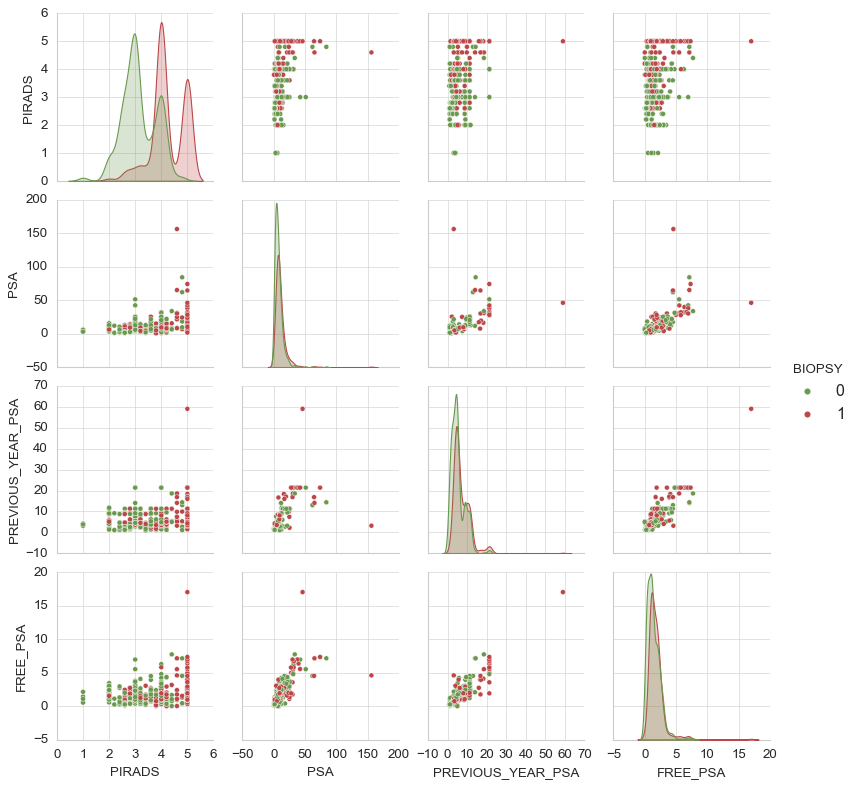

In [26]:
sns.pairplot(data_1,
             vars=['PIRADS','PSA',
                   'PREVIOUS_YEAR_PSA','FREE_PSA'],
            hue='BIOPSY', palette = ("#6a994e", "#bc4749"))
plt.show()

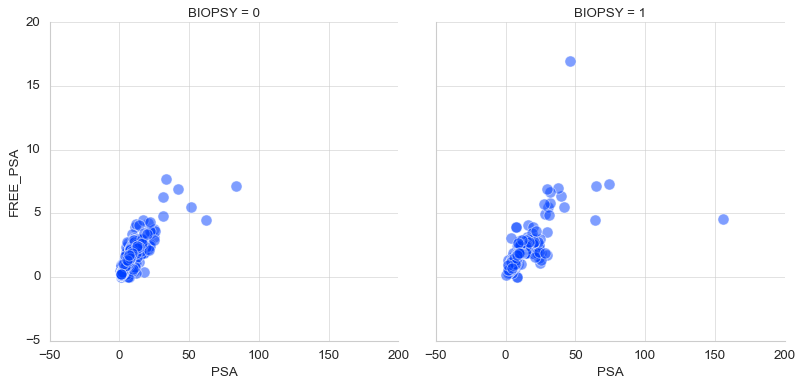

In [27]:
g = sns.FacetGrid(data_1, col="BIOPSY", height=5)
g.map(sns.scatterplot, "PSA", "FREE_PSA", palette = "deep", s=100, alpha=.5)
g.add_legend()

In [28]:
data_1.to_csv('Desktop/ML.csv')

## 3. MACHINE LEARNING MODELS FOR CLASSIFICATION

In [29]:
data_1.describe()

AGE         PSA    FREE_PSA  PREVIOUS_YEAR_PSA  PROSTATE_VOLUME  \
count  906.000000  906.000000  906.000000         906.000000       906.000000   
mean    63.722030    8.736619    1.538787           6.066723        51.500939   
std      8.585012    9.227791    1.190625           4.204590        28.337228   
min     30.000000    0.450000    0.000000           0.927460        11.000000   
25%     58.000000    4.342500    0.885815           3.528000        33.000000   
50%     64.000000    6.700000    1.244000           4.830000        44.889300   
75%     70.000000   10.439000    1.908000           8.760000        61.000000   
max     85.000000  156.000000   17.000000          59.000000       313.000000   

           PIRADS      BIOPSY  
count  906.000000  906.000000  
mean     3.628117    0.449227  
std      0.845030    0.497690  
min      1.000000    0.000000  
25%      3.000000    0.000000  
50%      4.000000    0.000000  
75%      4.000000    1.000000  
max      5.000000    1.000000

### LOGISTIC REGRESSION

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       499
           1       0.79      0.81      0.80       407

    accuracy                           0.82       906
   macro avg       0.81      0.81      0.81       906
weighted avg       0.82      0.82      0.82       906



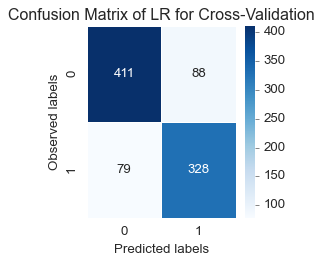

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',penalty='l2',C=1.0, max_iter=1000)

from sklearn.model_selection import cross_val_predict

X = data_1.iloc[:, 0:6]
y = data_1['BIOPSY']

# Logistic Regression
accuracy_lr_cv = cross_val_score(lr, X, y, scoring='accuracy', cv = 5)
precision_lr_cv = cross_val_score(lr, X, y, scoring='precision', cv = 5)
recall_lr_cv = cross_val_score(lr, X, y, scoring='recall', cv = 5)


#get the mean of each fold 
accuracy_lr_cv = accuracy_lr_cv.mean() * 100
precision_lr_cv = precision_lr_cv.mean() * 100
recall_lr_cv = recall_lr_cv.mean() * 100



y_pred_lr_cv = cross_val_predict(lr, X, y, cv=3)

# Evaluate Your Model's Performance Classification Metrics

# Classification Report

print(classification_report(y, y_pred_lr_cv))

# Confusion Matrix

cm_lr_cv = confusion_matrix(y, y_pred_lr_cv)


#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_lr_cv,annot=True,linewidths=0.5,fmt=".0f",ax=ax, cmap = "Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Observed labels')
ax.set_title('Confusion Matrix of LR for Cross-Validation')
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       210
           1       0.76      0.84      0.80       179

    accuracy                           0.80       389
   macro avg       0.81      0.81      0.80       389
weighted avg       0.81      0.80      0.80       389



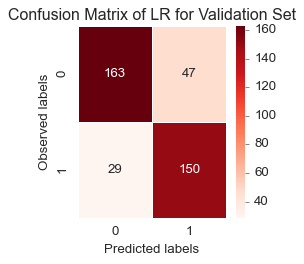

In [31]:
# Logistic Regression

results = lr.fit(X, y)
y_pred_lr = lr.predict(X_test)

# Evaluate Your Model's Performance Classification Metrics
# Accuracy Score

accuracy_lr = accuracy_score(Y_test, y_pred_lr)*100
precision_lr = precision_score(Y_test, y_pred_lr)*100
recall_lr = recall_score(Y_test, y_pred_lr)*100

# Classification Report

print(classification_report(Y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(Y_test, y_pred_lr)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_lr,annot=True,linewidths=0.5,fmt=".0f",ax=ax, cmap = "Reds")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Observed labels')
ax.set_title('Confusion Matrix of LR for Validation Set')
plt.show()

In [32]:
comparison_1 = {'LR':['For Cross Validation','For Validation Set']
                ,'Accuracy':[accuracy_lr_cv, accuracy_lr]
                ,'Precision':[precision_lr_cv, precision_lr]
                ,'Recall':[recall_lr_cv, recall_lr]}

comparison_table_1 = pd.DataFrame(comparison_1)
comparison_table_1.set_index("LR")                           
comparison_table_1

LR   Accuracy  Precision     Recall
0  For Cross Validation  81.339931  78.863245  79.828365
1    For Validation Set  80.462725  76.142132  83.798883

### SUPPORT VECTOR MACHINES

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       499
           1       0.76      0.57      0.65       407

    accuracy                           0.73       906
   macro avg       0.73      0.71      0.71       906
weighted avg       0.73      0.73      0.72       906



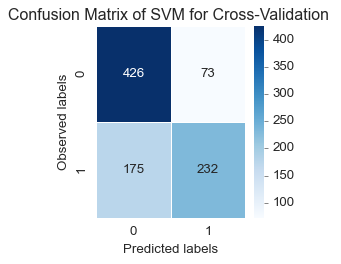

In [33]:
# Support Vector Machines (SVM)

from sklearn.svm import SVC
svc = SVC()

accuracy_svc_cv = cross_val_score(svc, X, y, scoring='accuracy', cv = 5)
precision_svc_cv = cross_val_score(svc, X, y, scoring='precision', cv = 5)
recall_svc_cv = cross_val_score(svc, X, y, scoring='recall', cv = 5)

#get the mean of each fold 
accuracy_svc_cv = accuracy_svc_cv.mean() * 100
precision_svc_cv = precision_svc_cv.mean() * 100
recall_svc_cv = recall_svc_cv.mean() * 100

y_pred_svc_cv = cross_val_predict(svc, X, y, cv=5)

# Evaluate Your Model's Performance Classification Metrics

# Classification Report

print(classification_report(y, y_pred_svc_cv))

# Confusion Matrix

cm_svc_cv = confusion_matrix(y, y_pred_svc_cv)


#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_svc_cv,annot=True,linewidths=0.5,fmt=".0f",ax=ax, cmap = "Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Observed labels')
ax.set_title('Confusion Matrix of SVM for Cross-Validation ')
plt.show()

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       210
           1       0.80      0.56      0.66       179

    accuracy                           0.73       389
   macro avg       0.75      0.72      0.72       389
weighted avg       0.75      0.73      0.72       389



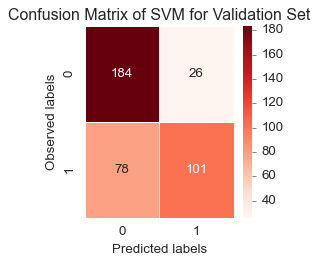

In [34]:
# Support Vector Machines (SVM)

results = svc.fit(X, y)
y_pred_svc = svc.predict(X_test)

# Evaluate Your Model's Performance Classification Metrics
# Accuracy Score

accuracy_svc = accuracy_score(Y_test, y_pred_svc)*100
precision_svc = precision_score(Y_test, y_pred_svc)*100
recall_svc = recall_score(Y_test, y_pred_svc)*100

# Classification Report

print(classification_report(Y_test, y_pred_svc))

# Confusion Matrix

cm_svc = confusion_matrix(Y_test, y_pred_svc)


#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_svc,annot=True,linewidths=0.5,fmt=".0f",ax=ax, cmap = "Reds")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Observed labels')
ax.set_title('Confusion Matrix of SVM for Validation Set')
plt.show()

In [35]:
comparison_2 = {'SVM':['For Cross Validation','For Validation Set']
                ,'Accuracy':[accuracy_svc_cv, accuracy_svc]
                ,'Precision':[precision_svc_cv, precision_svc]
                ,'Recall':[recall_svc_cv, recall_svc]}

comparison_table_2 = pd.DataFrame(comparison_2)
comparison_table_2.set_index("SVM")                           
comparison_table_2

SVM   Accuracy  Precision     Recall
0  For Cross Validation  72.625220  76.064830  56.997892
1    For Validation Set  73.264781  79.527559  56.424581

## K NEAREST NEIGBORS

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       499
           1       0.79      0.58      0.67       407

    accuracy                           0.74       906
   macro avg       0.75      0.73      0.73       906
weighted avg       0.75      0.74      0.73       906



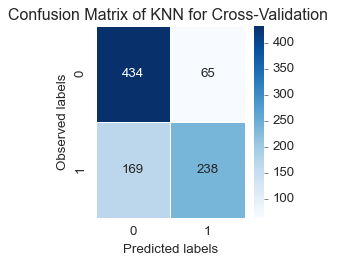

In [36]:
# KNN

from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors = 10, leaf_size = 25, p = 2)

accuracy_knn_cv = cross_val_score(knn, X, y, scoring='accuracy', cv = 5)
precision_knn_cv = cross_val_score(knn, X, y, scoring='precision', cv = 5)
recall_knn_cv = cross_val_score(knn, X, y, scoring='recall', cv = 5)

#get the mean of each fold 
accuracy_knn_cv = accuracy_knn_cv.mean() * 100
precision_knn_cv = precision_knn_cv.mean() * 100
recall_knn_cv = recall_knn_cv.mean() * 100


y_pred_knn_cv = cross_val_predict(knn, X, y, cv=5)

# Evaluate Your Model's Performance Classification Metrics

# Classification Report

print(classification_report(y, y_pred_knn_cv))

# Confusion Matrix

cm_knn_cv = confusion_matrix(y, y_pred_knn_cv)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_knn_cv,annot=True,linewidths=0.5,fmt=".0f",ax=ax, cmap = "Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Observed labels')
ax.set_title('Confusion Matrix of KNN for Cross-Validation ')
plt.show()

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       210
           1       0.78      0.57      0.66       179

    accuracy                           0.73       389
   macro avg       0.74      0.72      0.72       389
weighted avg       0.74      0.73      0.72       389



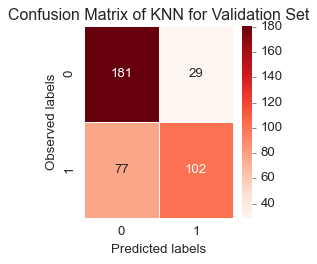

In [37]:
# KNN

results = knn.fit(X, y)
y_pred_knn = knn.predict(X_test)

# Evaluate Your Model's Performance Classification Metrics
# Accuracy Score

accuracy_knn = accuracy_score(Y_test, y_pred_knn)*100
precision_knn = precision_score(Y_test, y_pred_knn)*100
recall_knn = recall_score(Y_test, y_pred_knn)*100

# Classification Report

print(classification_report(Y_test, y_pred_knn))

# Confusion Matrix

cm_knn = confusion_matrix(Y_test, y_pred_knn)


#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_knn,annot=True,linewidths=0.5,fmt=".0f",ax=ax, cmap = "Reds")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Observed labels')
ax.set_title('Confusion Matrix of KNN for Validation Set')
plt.show()

In [38]:
comparison_3 = {'KNN':['For Cross Validation','For Validation Set']
                ,'Accuracy':[accuracy_knn_cv, accuracy_knn]
                ,'Precision':[precision_knn_cv, precision_knn]
                ,'Recall':[recall_knn_cv, recall_knn]}

comparison_table_3 = pd.DataFrame(comparison_3)
comparison_table_3.set_index("KNN")                           
comparison_table_3

KNN   Accuracy  Precision     Recall
0  For Cross Validation  74.170967  78.542882  58.461307
1    For Validation Set  72.750643  77.862595  56.983240

### NAIVE BAYES

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       499
           1       0.81      0.66      0.73       407

    accuracy                           0.78       906
   macro avg       0.79      0.77      0.77       906
weighted avg       0.78      0.78      0.78       906



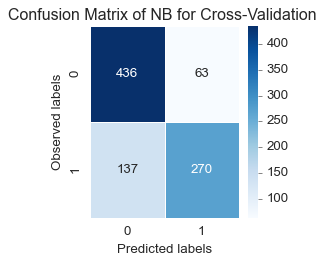

In [39]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

accuracy_gnb_cv = cross_val_score(gnb, X, y, scoring='accuracy', cv = 5)
precision_gnb_cv = cross_val_score(gnb, X, y, scoring='precision', cv = 5)
recall_gnb_cv = cross_val_score(gnb, X, y, scoring='recall', cv = 5)

#get the mean of each fold 
accuracy_gnb_cv = accuracy_gnb_cv.mean() * 100
precision_gnb_cv = precision_gnb_cv.mean() * 100
recall_gnb_cv = recall_gnb_cv.mean() * 100

y_pred_gnb_cv = cross_val_predict(gnb, X, y, cv=5)

# Evaluate Your Model's Performance Classification Metrics

# Classification Report

print(classification_report(y, y_pred_gnb_cv))

# Confusion Matrix

cm_gnb_cv = confusion_matrix(y, y_pred_gnb_cv)


#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_gnb_cv,annot=True,linewidths=0.5,fmt=".0f",ax=ax, cmap = "Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Observed labels')
ax.set_title('Confusion Matrix of NB for Cross-Validation ')
plt.show()

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       210
           1       0.81      0.71      0.76       179

    accuracy                           0.79       389
   macro avg       0.80      0.79      0.79       389
weighted avg       0.79      0.79      0.79       389



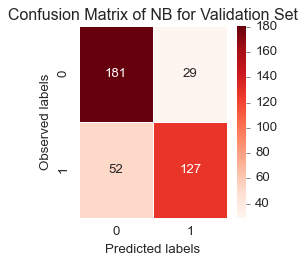

In [40]:
# Naive Bayes

results = gnb.fit(X, y)
y_pred_gnb = gnb.predict(X_test)

# Evaluate Your Model's Performance Classification Metrics
# Accuracy Score

accuracy_gnb = accuracy_score(Y_test, y_pred_gnb)*100
precision_gnb = precision_score(Y_test, y_pred_gnb)*100
recall_gnb = recall_score(Y_test, y_pred_gnb)*100

# Classification Report

print(classification_report(Y_test, y_pred_gnb))

# Confusion Matrix

cm_gnb = confusion_matrix(Y_test, y_pred_gnb)


#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_gnb,annot=True,linewidths=0.5,fmt=".0f",ax=ax, cmap = "Reds")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Observed labels')
ax.set_title('Confusion Matrix of NB for Validation Set')
plt.show()

In [41]:
comparison_4 = {'NB':['For Cross Validation','For Validation Set']
                ,'Accuracy':[accuracy_gnb_cv, accuracy_gnb]
                ,'Precision':[precision_gnb_cv, precision_gnb]
                ,'Recall':[recall_gnb_cv, recall_gnb]}

comparison_table_4 = pd.DataFrame(comparison_4)
comparison_table_4.set_index("NB")                           
comparison_table_4

NB   Accuracy  Precision     Recall
0  For Cross Validation  77.923016  81.373216  66.323397
1    For Validation Set  79.177378  81.410256  70.949721

### DECISION TREES

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       499
           1       0.77      0.74      0.75       407

    accuracy                           0.78       906
   macro avg       0.78      0.78      0.78       906
weighted avg       0.78      0.78      0.78       906



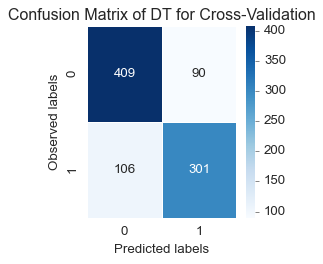

In [42]:
# Decision Trees

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=30)

accuracy_dt_cv = cross_val_score(dt, X, y, scoring='accuracy', cv = 5) #get the mean of each fold 
accuracy_dt_cv = accuracy_dt_cv.mean() * 100

precision_dt_cv = cross_val_score(dt, X, y, scoring='precision', cv = 5) #get the mean of each fold 
precision_dt_cv = precision_dt_cv.mean() * 100

recall_dt_cv = cross_val_score(dt, X, y, scoring='recall', cv = 5) #get the mean of each fold 
recall_dt_cv = recall_dt_cv.mean() * 100


y_pred_dt_cv = cross_val_predict(dt, X, y, cv=5)

# Evaluate Your Model's Performance Classification Metrics

# Classification Report

print(classification_report(y, y_pred_dt_cv))

# Confusion Matrix

cm_dt_cv = confusion_matrix(y, y_pred_dt_cv)


#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_dt_cv,annot=True,linewidths=0.5,fmt=".0f",ax=ax, cmap = "Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Observed labels')
ax.set_title('Confusion Matrix of DT for Cross-Validation')
plt.show()

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       210
           1       0.73      0.74      0.74       179

    accuracy                           0.76       389
   macro avg       0.76      0.76      0.76       389
weighted avg       0.76      0.76      0.76       389



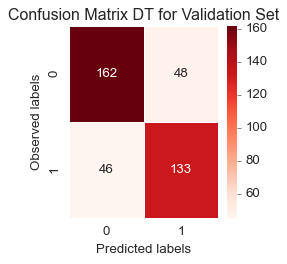

In [43]:
results = dt.fit(X, y)
y_pred_dt = dt.predict(X_test)

# Evaluate Your Model's Performance Classification Metrics
# Accuracy Score

accuracy_dt = accuracy_score(Y_test, y_pred_dt)*100
precision_dt = precision_score(Y_test, y_pred_dt)*100
recall_dt = recall_score(Y_test, y_pred_dt)*100

# Classification Report

print(classification_report(Y_test, y_pred_dt))

# Confusion Matrix

cm_dt = confusion_matrix(Y_test, y_pred_dt)


#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_dt,annot=True,linewidths=0.5,fmt=".0f",ax=ax, cmap = "Reds")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Observed labels')
ax.set_title('Confusion Matrix DT for Validation Set')
plt.show()

[Text(0.5769230769230769, 0.875, 'PIRADS <= 3.937\ngini = 0.495\nsamples = 906\nvalue = [499, 407]'),
 Text(0.3076923076923077, 0.625, 'PIRADS <= 3.1\ngini = 0.227\nsamples = 445\nvalue = [387, 58]'),
 Text(0.15384615384615385, 0.375, 'PREVIOUS_YEAR_PSA <= 4.695\ngini = 0.129\nsamples = 333\nvalue = [310, 23]'),
 Text(0.07692307692307693, 0.125, '\n  (...)  \n'),
 Text(0.23076923076923078, 0.125, '\n  (...)  \n'),
 Text(0.46153846153846156, 0.375, 'PREVIOUS_YEAR_PSA <= 3.378\ngini = 0.43\nsamples = 112\nvalue = [77, 35]'),
 Text(0.38461538461538464, 0.125, '\n  (...)  \n'),
 Text(0.5384615384615384, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.625, 'PIRADS <= 4.9\ngini = 0.368\nsamples = 461\nvalue = [112, 349]'),
 Text(0.7692307692307693, 0.375, 'AGE <= 69.1\ngini = 0.449\nsamples = 329\nvalue = [112, 217]'),
 Text(0.6923076923076923, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.125, '\n  (...)  \n'),
 Text(0.9230769230769231, 0.375, 'gini = 0.0\nsamples = 132\nvalue =

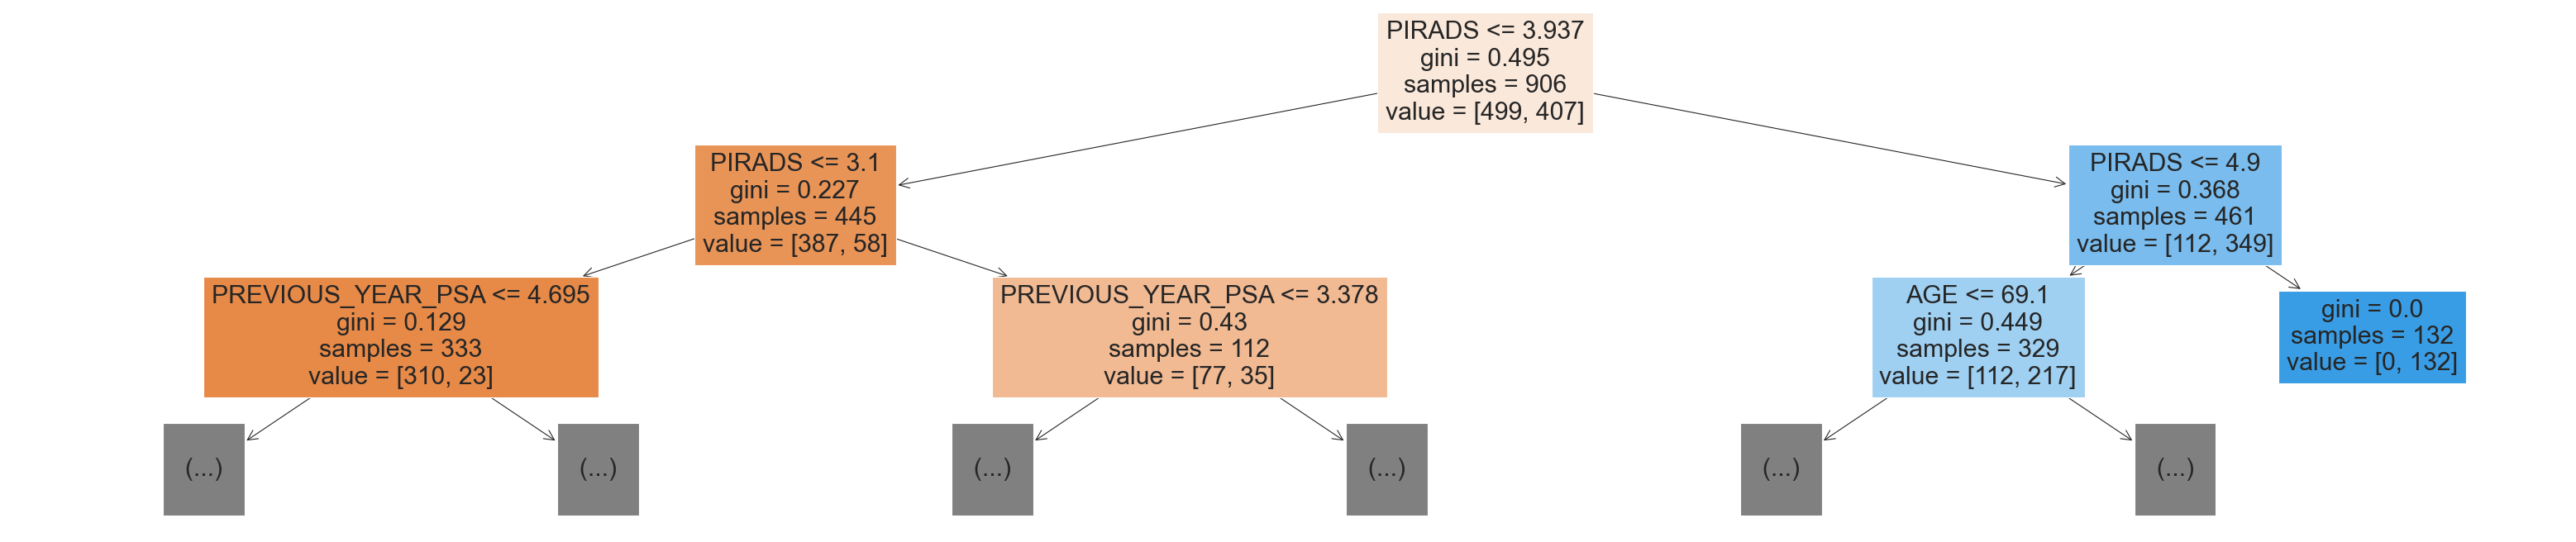

In [44]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(50,10))

plot_tree(dt, feature_names=X.columns, max_depth=2, filled=True)

In [45]:
comparison_5 = {'DT':['For Cross Validation','For Validation Set']
                ,'Accuracy':[accuracy_dt_cv, accuracy_dt]
                ,'Precision':[precision_dt_cv, precision_dt]
                ,'Recall':[recall_dt_cv, recall_dt]}

comparison_table_5 = pd.DataFrame(comparison_5)
comparison_table_5.set_index("DT")                           
comparison_table_5

DT   Accuracy  Precision     Recall
0  For Cross Validation  78.142189  76.222578  75.173141
1    For Validation Set  75.835476  73.480663  74.301676

### RANDOM FOREST

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       499
           1       0.80      0.78      0.79       407

    accuracy                           0.81       906
   macro avg       0.81      0.81      0.81       906
weighted avg       0.81      0.81      0.81       906



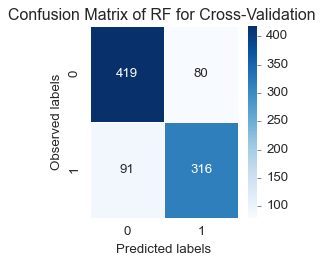

In [129]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 20, n_estimators=400)

accuracy_rf_cv = cross_val_score(rf, X, y, scoring='accuracy', cv = 5) #get the mean of each fold 
accuracy_rf_cv = accuracy_rf_cv.mean() * 100

precision_rf_cv = cross_val_score(rf, X, y, scoring='precision', cv = 5) #get the mean of each fold 
precision_rf_cv = precision_rf_cv.mean() * 100

recall_rf_cv = cross_val_score(rf, X, y, scoring='recall', cv = 5) #get the mean of each fold 
recall_rf_cv = recall_rf_cv.mean() * 100


y_pred_rf_cv = cross_val_predict(rf, X, y, cv=5)

# Evaluate Your Model's Performance Classification Metrics

# Classification Report

print(classification_report(y, y_pred_rf_cv))

# Confusion Matrix

cm_rf_cv = confusion_matrix(y, y_pred_rf_cv)



#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_rf_cv,annot=True,linewidths=0.5,fmt=".0f",ax=ax, cmap = "Blues")
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Observed labels');
ax.set_title('Confusion Matrix of RF for Cross-Validation ');
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       210
           1       0.80      0.80      0.80       179

    accuracy                           0.81       389
   macro avg       0.81      0.81      0.81       389
weighted avg       0.82      0.81      0.81       389



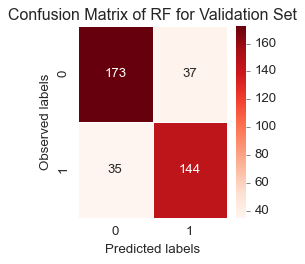

In [130]:
results = rf.fit(X, y)
y_pred_rf = rf.predict(X_test)

# Evaluate Your Model's Performance Classification Metrics
# Accuracy Score

accuracy_rf = accuracy_score(Y_test, y_pred_rf)*100
precision_rf = precision_score(Y_test, y_pred_rf)*100
recall_rf = recall_score(Y_test, y_pred_rf)*100

# Classification Report

print(classification_report(Y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(Y_test, y_pred_rf)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_rf,annot=True,linewidths=0.5,fmt=".0f",ax=ax, cmap = "Reds")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Observed labels')
ax.set_title('Confusion Matrix of RF for Validation Set')
plt.show()

In [131]:
comparison_6 = {'RF':['For Cross Validation','For Validation Set']
                ,'Accuracy':[accuracy_rf_cv, accuracy_rf]
                ,'Precision':[precision_rf_cv, precision_rf]
                ,'Recall':[recall_rf_cv, recall_rf]}

comparison_table_6 = pd.DataFrame(comparison_6)
comparison_table_6.set_index("RF")                           
comparison_table_6

RF   Accuracy  Precision     Recall
0  For Cross Validation  82.444903  81.205437  79.346582
1    For Validation Set  81.491003  79.558011  80.446927

### GRADIENT BOOSTING CLASSIFIER

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       499
           1       0.81      0.80      0.81       407

    accuracy                           0.83       906
   macro avg       0.83      0.82      0.82       906
weighted avg       0.83      0.83      0.83       906



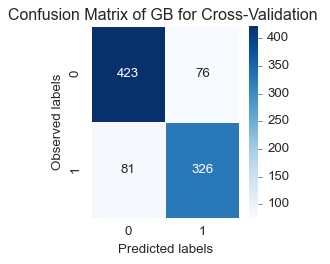

In [116]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate= 0.05)


accuracy_clf_cv = cross_val_score(clf, X, y, scoring='accuracy', cv = 5) #get the mean of each fold 
accuracy_clf_cv = accuracy_clf_cv.mean() * 100

precision_clf_cv = cross_val_score(clf, X, y, scoring='precision', cv = 5) #get the mean of each fold 
precision_clf_cv = precision_clf_cv.mean() * 100

recall_clf_cv = cross_val_score(clf, X, y, scoring='recall', cv = 5) #get the mean of each fold 
recall_clf_cv = recall_clf_cv.mean() * 100


y_pred_clf_cv = cross_val_predict(clf, X, y, cv=5)

# Evaluate Your Model's Performance Classification Metrics

# Classification Report

print(classification_report(y, y_pred_clf_cv))

# Confusion Matrix

cm_clf_cv = confusion_matrix(y, y_pred_clf_cv)



#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_clf_cv,annot=True,linewidths=0.5,fmt=".0f",ax=ax, cmap = "Blues")
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Observed labels');
ax.set_title('Confusion Matrix of GB for Cross-Validation ');
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       210
           1       0.78      0.83      0.80       179

    accuracy                           0.81       389
   macro avg       0.81      0.81      0.81       389
weighted avg       0.81      0.81      0.81       389



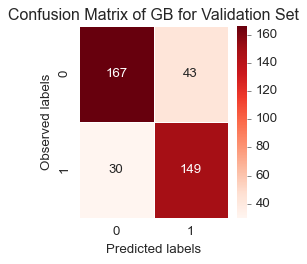

In [117]:
results = clf.fit(X, y)
y_pred_clf = clf.predict(X_test)

# Evaluate Your Model's Performance Classification Metrics
# Accuracy Score

accuracy_clf = accuracy_score(Y_test, y_pred_clf)*100
precision_clf = precision_score(Y_test, y_pred_clf)*100
recall_clf = recall_score(Y_test, y_pred_clf)*100

# Classification Report

print(classification_report(Y_test, y_pred_clf))

# Confusion Matrix
cm_clf = confusion_matrix(Y_test, y_pred_clf)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_clf,annot=True,linewidths=0.5,fmt=".0f",ax=ax, cmap = "Reds")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Observed labels')
ax.set_title('Confusion Matrix of GB for Validation Set')
plt.show()

In [118]:
comparison_7 = {'GB':['For Cross Validation','For Validation Set']
                ,'Accuracy':[accuracy_clf_cv, accuracy_clf]
                ,'Precision':[precision_clf_cv, precision_clf]
                ,'Recall':[recall_clf_cv, recall_clf]}

comparison_table_7 = pd.DataFrame(comparison_7)
comparison_table_7.set_index("GB")                           
comparison_table_7

GB   Accuracy  Precision     Recall
0  For Cross Validation  82.664683  81.086377  80.081301
1    For Validation Set  81.233933  77.604167  83.240223

### XGBOOST CLASSIFIER

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       499
           1       0.78      0.83      0.80       407

    accuracy                           0.82       906
   macro avg       0.81      0.82      0.81       906
weighted avg       0.82      0.82      0.82       906



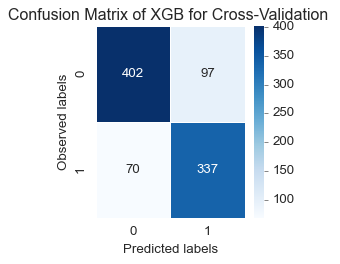

In [108]:
# XGBoost Classifier

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

xgb = XGBClassifier(max_depth = 3, learning_rate = 0.02, n_estimators= 100, use_label_encoder=False, eval_metric = 'error')

accuracy_xgb_cv = cross_val_score(xgb, X, y, scoring='accuracy', cv = 5) #get the mean of each fold 
accuracy_xgb_cv = accuracy_xgb_cv.mean() * 100

precision_xgb_cv = cross_val_score(xgb, X, y, scoring='precision', cv = 5) #get the mean of each fold 
precision_xgb_cv = precision_xgb_cv.mean() * 100

recall_xgb_cv = cross_val_score(xgb, X, y, scoring='recall', cv = 5) #get the mean of each fold 
recall_xgb_cv = recall_xgb_cv.mean() * 100


y_pred_xgb_cv = cross_val_predict(xgb, X, y, cv=5)

# Evaluate Your Model's Performance Classification Metrics

# Classification Report

print(classification_report(y, y_pred_xgb_cv))

# Confusion Matrix

cm_xgb_cv = confusion_matrix(y, y_pred_xgb_cv)



#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_xgb_cv,annot=True,linewidths=0.5,fmt=".0f",ax=ax, cmap = "Blues")
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Observed labels');
ax.set_title('Confusion Matrix of XGB for Cross-Validation ');
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       210
           1       0.76      0.88      0.82       179

    accuracy                           0.82       389
   macro avg       0.82      0.82      0.82       389
weighted avg       0.83      0.82      0.82       389



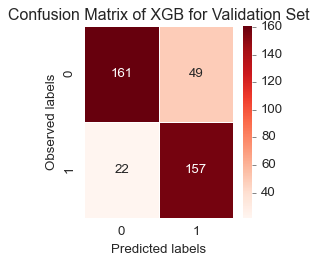

In [109]:
results = xgb.fit(X, y)
y_pred_xgb = xgb.predict(X_test)

# Evaluate Your Model's Performance Classification Metrics
# Accuracy Score

accuracy_xgb = accuracy_score(Y_test, y_pred_xgb)*100
precision_xgb = precision_score(Y_test, y_pred_xgb)*100
recall_xgb = recall_score(Y_test, y_pred_xgb)*100

# Classification Report

print(classification_report(Y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(Y_test, y_pred_xgb)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_xgb,annot=True,linewidths=0.5,fmt=".0f",ax=ax, cmap = "Reds")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Observed labels')
ax.set_title('Confusion Matrix of XGB for Validation Set')
plt.show()

In [110]:
comparison_8 = {'XGB':['For Cross Validation','For Validation Set']
                ,'Accuracy':[accuracy_xgb_cv, accuracy_xgb]
                ,'Precision':[precision_xgb_cv, precision_xgb]
                ,'Recall':[recall_xgb_cv, recall_xgb]}

comparison_table_8 = pd.DataFrame(comparison_8)
comparison_table_8.set_index("XGB")                           
comparison_table_8

XGB   Accuracy  Precision     Recall
0  For Cross Validation  81.560318  77.913468  82.782294
1    For Validation Set  81.748072  76.213592  87.709497

### LIGHTGBM CLASSIFIER

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       499
           1       0.80      0.78      0.79       407

    accuracy                           0.81       906
   macro avg       0.81      0.81      0.81       906
weighted avg       0.81      0.81      0.81       906



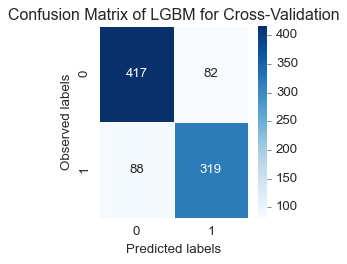

In [111]:
# LightGBM Classifier

import lightgbm as lgb
lgb = lgb.LGBMClassifier(learning_rate = 0.03)

accuracy_lgb_cv = cross_val_score(lgb, X, y, scoring='accuracy', cv = 5) #get the mean of each fold 
accuracy_lgb_cv = accuracy_lgb_cv.mean() * 100

precision_lgb_cv = cross_val_score(lgb, X, y, scoring='precision', cv = 5) #get the mean of each fold 
precision_lgb_cv = precision_lgb_cv.mean() *100

recall_lgb_cv = cross_val_score(lgb, X, y, scoring='recall', cv = 5) #get the mean of each fold 
recall_lgb_cv = recall_lgb_cv.mean()*100


y_pred_lgb_cv = cross_val_predict(lgb, X, y, cv=5)

# Evaluate Your Model's Performance Classification Metrics

# Classification Report

print(classification_report(y, y_pred_lgb_cv))

# Confusion Matrix

cm_lgb_cv = confusion_matrix(y, y_pred_lgb_cv)



#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_lgb_cv,annot=True,linewidths=0.5,fmt=".0f",ax=ax, cmap = "Blues")
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Observed labels');
ax.set_title('Confusion Matrix of LGBM for Cross-Validation');
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       210
           1       0.80      0.80      0.80       179

    accuracy                           0.81       389
   macro avg       0.81      0.81      0.81       389
weighted avg       0.82      0.81      0.81       389



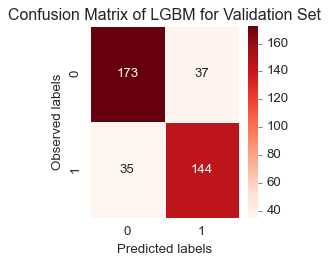

In [112]:
results = lgb.fit(X, y)
y_pred_lgb = lgb.predict(X_test)

# Evaluate Your Model's Performance Classification Metrics
# Accuracy Score

accuracy_lgb = accuracy_score(Y_test, y_pred_lgb)*100
precision_lgb = precision_score(Y_test, y_pred_lgb)*100
recall_lgb = recall_score(Y_test, y_pred_lgb)*100

# Classification Report

print(classification_report(Y_test, y_pred_lgb))

# Confusion Matrix
cm_lgb = confusion_matrix(Y_test, y_pred_lgb)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_lgb,annot=True,linewidths=0.5,fmt=".0f",ax=ax, cmap = "Reds")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Observed labels')
ax.set_title('Confusion Matrix of LGBM for Validation Set')
plt.show()

In [113]:
comparison_9 = {'LGBM':['For Cross Validation','For Validation Set']
                ,'Accuracy':[accuracy_lgb_cv, accuracy_lgb]
                ,'Precision':[precision_lgb_cv, precision_lgb]
                ,'Recall':[recall_lgb_cv, recall_lgb]}

comparison_table_9 = pd.DataFrame(comparison_9)
comparison_table_9.set_index("LGBM")                           
comparison_table_9

LGBM   Accuracy  Precision     Recall
0  For Cross Validation  81.233076  79.660288  78.370973
1    For Validation Set  81.491003  79.558011  80.446927

## 4. COMPARISON OF THE RESULTS

In [132]:
# Creating a table of accuracies
comparison = {'For Validation Set':['K-Nearest Neighbors', 'Support Vector Machines','Naive Bayes', 'Decision Tree','Random Forest', 'Gradient Boosting Classifier',  'Logistic Regression', 'LightGBM Classifier'
                          , 'XGBoost Classifier']
                   ,'Accuracy':[ accuracy_knn, accuracy_svc,accuracy_gnb,  accuracy_dt, accuracy_rf, accuracy_clf, accuracy_lr, accuracy_lgb, accuracy_xgb]
                ,'Precision':[ precision_knn, precision_svc, precision_gnb, precision_dt,  precision_rf, precision_clf, precision_lr,precision_lgb, precision_xgb]
                ,'Recall':[recall_knn, recall_svc, recall_gnb, recall_dt, recall_rf,recall_clf,  recall_lr, recall_lgb, recall_xgb]}

comparison_table = pd.DataFrame(comparison)
comparison_table.set_index("For Validation Set")
comparison_table

For Validation Set   Accuracy  Precision     Recall
0           K-Nearest Neighbors  72.750643  77.862595  56.983240
1       Support Vector Machines  73.264781  79.527559  56.424581
2                   Naive Bayes  79.177378  81.410256  70.949721
3                 Decision Tree  75.835476  73.480663  74.301676
4                 Random Forest  81.491003  79.558011  80.446927
5  Gradient Boosting Classifier  81.233933  77.604167  83.240223
6           Logistic Regression  80.462725  76.142132  83.798883
7           LightGBM Classifier  81.491003  79.558011  80.446927
8            XGBoost Classifier  81.748072  76.213592  87.709497

In [133]:
# Creating a table of accuracies
comparison_cv = {'For Cross Validation':['K-Nearest Neighbors', 'Support Vector Machines','Naive Bayes', 'Decision Tree', 'Random Forest','Gradient Boosting Classifier',  'Logistic Regression', 'LightGBM Classifier'
                          , 'XGBoost Classifier']
                   ,'Accuracy':[accuracy_knn_cv, accuracy_svc_cv,accuracy_gnb_cv,  accuracy_dt_cv, accuracy_rf_cv,accuracy_clf_cv, accuracy_lr_cv,  accuracy_lgb_cv, accuracy_xgb_cv]
                ,'Precision':[precision_knn_cv, precision_svc_cv,precision_gnb_cv,  precision_dt_cv, precision_rf_cv, precision_clf_cv,  precision_lr_cv, precision_lgb_cv, precision_xgb_cv]
                ,'Recall':[recall_knn_cv, recall_svc_cv,recall_gnb_cv,  recall_dt_cv,  recall_rf_cv,recall_clf_cv, recall_lr_cv, recall_lgb_cv, recall_xgb_cv]}

comparison_table_cv = pd.DataFrame(comparison_cv)
comparison_table_cv.set_index("For Cross Validation")
comparison_table_cv

For Cross Validation   Accuracy  Precision     Recall
0           K-Nearest Neighbors  74.170967  78.542882  58.461307
1       Support Vector Machines  72.625220  76.064830  56.997892
2                   Naive Bayes  77.923016  81.373216  66.323397
3                 Decision Tree  78.142189  76.222578  75.173141
4                 Random Forest  82.444903  81.205437  79.346582
5  Gradient Boosting Classifier  82.664683  81.086377  80.081301
6           Logistic Regression  81.339931  78.863245  79.828365
7           LightGBM Classifier  81.233076  79.660288  78.370973
8            XGBoost Classifier  81.560318  77.913468  82.782294